In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.listdir('/content/drive/MyDrive')

['EVISION ENROLLMENT PROCESS.pdf',
 'Coursework Assessment 1.pdf',
 'basantasir.week9.pdf.docx',
 'CEASER_cipher.py',
 'Colab Notebooks',
 'AI',
 'HDI_Assignment',
 'Final Portfolio 2026 Instructions - Biratnagar.pdf',
 'FuelConsumption .csv',
 'Testing_indian_liver_disease_dataset.csv']

Loading the dataset

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/FuelConsumption .csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.isnull().sum()

,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0


Exploratory Data Analysis (EDA)

Looking at column names

In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

Summary statistics

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Target variable distribution

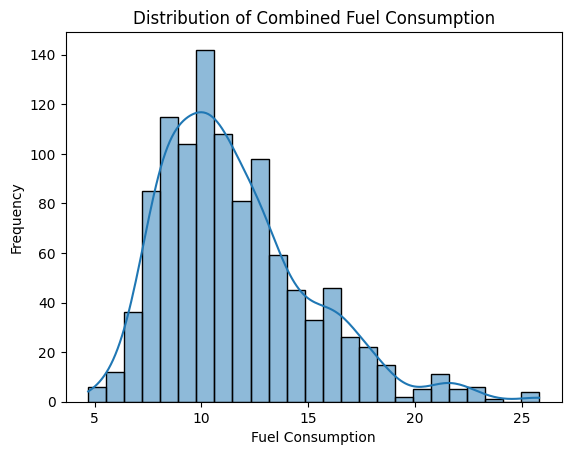

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(df['FUELCONSUMPTION_COMB'], kde=True)
plt.title('Distribution of Combined Fuel Consumption')
plt.xlabel('Fuel Consumption')
plt.ylabel('Frequency')
plt.show()

"The distribution shows that most vehicles have moderate fuel consumption, with fewer vehicles having very high consumption"

# EDA CONTINUATION

Correlation Heatmap


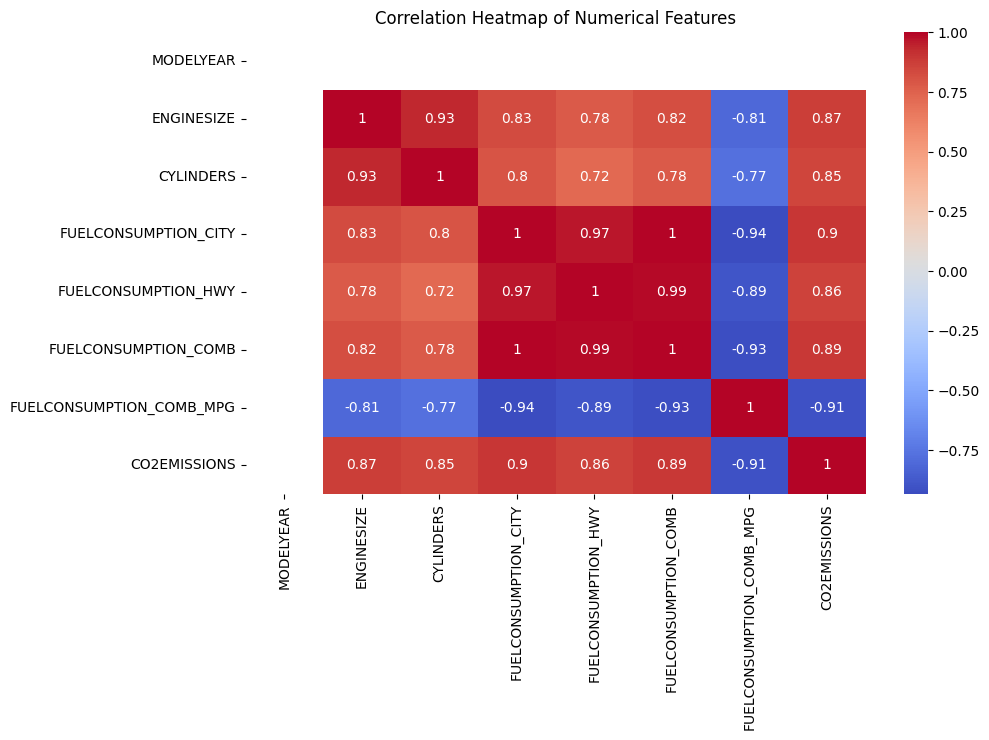

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

"The heatmap shows that engine size, number of cylinders, and CO₂ emissions have a strong positive correlation with fuel consumption, indicating that as these features increase, fuel consumption also increases."

Scatter Plot

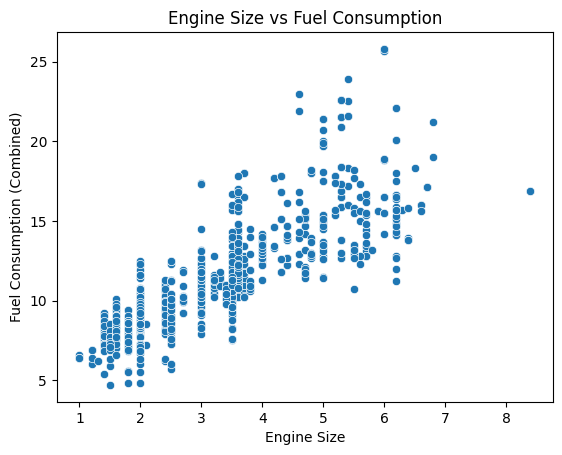

In [9]:
plt.figure()
sns.scatterplot(
    x=df['ENGINESIZE'],
    y=df['FUELCONSUMPTION_COMB']
)
plt.title('Engine Size vs Fuel Consumption')
plt.xlabel('Engine Size')
plt.ylabel('Fuel Consumption (Combined)')
plt.show()

"The scatter plot shows a clear upward trend, indicating that vehicles with larger engine sizes generally consume more fuel."

### Another Scatter Plot (CO₂ vs Fuel)

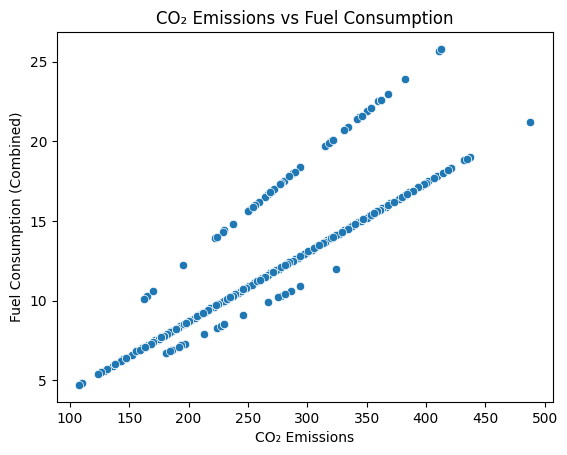

In [10]:
plt.figure()
sns.scatterplot(
    x=df['CO2EMISSIONS'],
    y=df['FUELCONSUMPTION_COMB']
)
plt.title('CO₂ Emissions vs Fuel Consumption')
plt.xlabel('CO₂ Emissions')
plt.ylabel('Fuel Consumption (Combined)')
plt.show()

"There is a strong positive relationship between CO₂ emissions and fuel consumption, which is expected since higher fuel usage leads to higher emissions."


# Neural Network Model for Regression

Separate Features (X) and Target (y)

In [11]:

X = df.drop('FUELCONSUMPTION_COMB', axis=1)
y = df['FUELCONSUMPTION_COMB']

print("FEATURES (X) – first 5 rows:")
display(X.head())

print("\nTARGET (y) – first 5 values:")
display(y.head())

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

FEATURES (X) – first 5 rows:


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,27,244



TARGET (y) – first 5 values:


,FUELCONSUMPTION_COMB
0,8.5
1,9.6
2,5.9
3,11.1
4,10.6



Shape of X: (1067, 12)
Shape of y: (1067,)


Convert categorical columns to numbers

In [12]:
X = pd.get_dummies(X, drop_first=True)

Train–Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
print("Shape of X after encoding:")
print(X.shape)

print("\nTraining data shape:")
print(X_train.shape, y_train.shape)

print("\nTesting data shape:")
print(X_test.shape, y_test.shape)

print("\nEncoded feature names (first 10):")
print(X.columns[:10])

Shape of X after encoding:
(1067, 746)

Training data shape:
(853, 746) (853,)

Testing data shape:
(214, 746) (214,)

Encoded feature names (first 10):
Index(['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS',
       'MAKE_ASTON MARTIN', 'MAKE_AUDI', 'MAKE_BENTLEY'],
      dtype='object')


Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print("First 5 rows of scaled X_train:")
print(X_train[:5])

print("\nMean of scaled features (should be ~0):")
print(X_train.mean(axis=0)[:5])

print("\nStandard deviation of scaled features (should be ~1):")
print(X_train.std(axis=0)[:5])

print("\nShapes after scaling:")
print(X_train.shape, X_test.shape)

First 5 rows of scaled X_train:
[[ 0.         -1.38536397 -0.99621998 ... -0.30821029  1.04681569
  -0.83416129]
 [ 0.          0.73646174  1.20955716 ... -0.30821029 -0.955278
   1.19880893]
 [ 0.         -0.25372359  0.10666859 ... -0.30821029 -0.955278
  -0.83416129]
 [ 0.         -0.25372359  0.10666859 ... -0.30821029 -0.955278
   1.19880893]
 [ 0.          1.37300946  1.20955716 ... -0.30821029  1.04681569
  -0.83416129]]

Mean of scaled features (should be ~0):
[ 0.00000000e+00  1.27031380e-16  1.70763495e-16 -3.89424067e-16
 -5.61228802e-16]

Standard deviation of scaled features (should be ~1):
[0. 1. 1. 1. 1.]

Shapes after scaling:
(853, 746) (214, 746)


Build Neural Network (MLP Regressor)

In [17]:
from sklearn.neural_network import MLPRegressor

# Initialize the MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 11.200274018137968
RMSE: 3.346681045175648
R2 Score: 0.10341768523562045


Train the Neural Network

In [19]:
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

Evaluate Neural Network

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_mlp = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred_mlp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_mlp)

mse, rmse, r2

(11.200274018137968, np.float64(3.346681045175648), 0.10341768523562045)

# Build TWO Classical Regression Models (20 Marks)

Evaluate LINEAR REGRESSION

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)

Linear Regression Results
MAE: 0.03158718211709639
MSE: 0.0014802936470643176
RMSE: 0.03847458443004054
R2: 0.9998815024433807


Train & Evaluate RANDOM FOREST REGRESSOR

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluate Random Forest

In [23]:
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

Random Forest Results
MAE: 0.038696261682247116
MSE: 0.01185473364485989
RMSE: 0.10887944546543159
R2: 0.9990510281699349


In [24]:
print("Random Forest Results (Rounded)")
print("MAE:", round(mae_rf, 3))
print("MSE:", round(mse_rf, 3))
print("RMSE:", round(rmse_rf, 3))
print("R2:", round(r2_rf, 3))

Random Forest Results (Rounded)
MAE: 0.039
MSE: 0.012
RMSE: 0.109
R2: 0.999


# Hyperparameter Tuning using GridSearchCV

Import GridSearchCV

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Define Parameter Grid

In [26]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}


Create GridSearch Object

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)


Fit GridSearch

In [28]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

Best Parameters

In [29]:
print("Best Parameters:", rf_grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


Evaluate Tuned Model

In [30]:
best_rf = rf_grid.best_estimator_

y_pred_best = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Tuned Random Forest Results")
print("MAE:", round(mae_best, 3))
print("RMSE:", round(rmse_best, 3))
print("R2:", round(r2_best, 3))

Tuned Random Forest Results
MAE: 0.04
RMSE: 0.113
R2: 0.999
